<a href="https://colab.research.google.com/github/Felipeosouz/Formacao-Cientista-de-Dados/blob/main/Regress%C3%A3o%20Linear/RegressaoLinearSimples.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import ResidualsPlot

base = pd.read_csv("cars.csv")
base.shape

(50, 3)

In [3]:
base.head()

,Unnamed: 0,speed,dist
0,1,4,2
1,2,4,10
2,3,7,4
3,4,7,22
4,5,8,16


In [5]:
base = base.drop(['Unnamed: 0'], axis=1)
base.head()

,speed,dist
0,4,2
1,4,10
2,7,4
3,7,22
4,8,16


In [10]:
# Definição das variáveis X e y, X distância é a variável independente e y velocidade é a variável dependente
X = base.iloc[:, 1].values
y = base.iloc[:, 0].values
X

array([  2,  10,   4,  22,  16,  10,  18,  26,  34,  17,  28,  14,  20,
        24,  28,  26,  34,  34,  46,  26,  36,  60,  80,  20,  26,  54,
        32,  40,  32,  40,  50,  42,  56,  76,  84,  36,  46,  68,  32,
        48,  52,  56,  64,  66,  54,  70,  92,  93, 120,  85])

In [11]:
# Cálculo da correlação entre X e y
correlacao = np.corrcoef(X, y)
correlacao

array([[1.       , 0.8068949],
       [0.8068949, 1.       ]])

In [31]:
# Formato de matriz com uma coluna a mais
X = X.reshape(-1, 1)
# Criação do modeo e treinamento (fit indica que o treinamento deve ser executado)
modelo = LinearRegression()
modelo.fit(X, y)

LinearRegression()

In [32]:
# Interceptação no eixo Y
modelo.intercept_

8.283905641787172

In [33]:
# Inclinação
modelo.coef_

array([0.16556757])

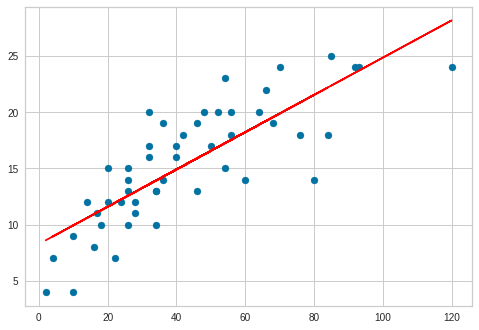

In [35]:
# Geração do gráfico com os ponto reais e as previsões
plt.scatter(X, y)
plt.plot(X, modelo.predict(X), color="red")

In [38]:
# Previsão da "distância 27 pés" usando a fórmula manual
# interceptação + inclinação * distância
# Qual a velocidade se levou 27 pés para parar?
modelo.intercept_ + modelo.coef_ * 27

array([12.75423016])

In [39]:
# Previsão utilizando função do sklearn
modelo.predict([[27]])

array([12.75423016])

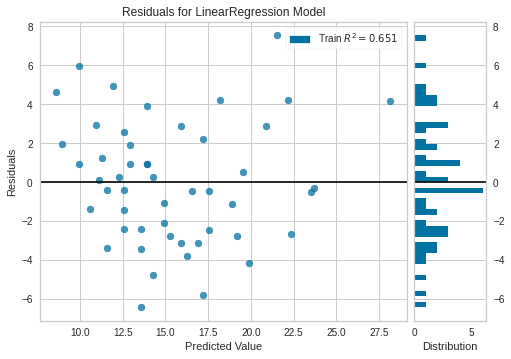

<AxesSubplot:title={'center':'Residuals for LinearRegression Model'}, xlabel='Predicted Value', ylabel='Residuals'>

In [41]:
# Gráfico para visualizar os residuais
visualizador = ResidualsPlot(modelo)
visualizador.fit(X, y)
visualizador.poof()